### Project - US Accidents Analysis

##### Datasource : https://www.kaggle.com/sobhanmoosavi/us-accidents


 click <a href='https://smoosavi.org/datasets/us_accidents'>here</a> for description of the dataset

### The analysis for this project will follow the CRISP-DM pipeline which are ;
<a id='the_destination'></a>
+ Business Understanding 
+ Data Understanding
+ Data Preparation
+ Data Modelling
+ Results
+ Deployment - Storytelling




 ###  Business Understanding

In these analysis, the following questions will be answered ;
+ Time distribution of Accident by Severity
+ Demography Accident Analysis
+ Severity Analysis base on Weather

### Data Understanding and Data Preparation

The two stages will be combined together as the `Exploratory Data Analysis (EDA)`. The data preprocessing that will done includes;

+ Checking for Missing informations and treating them
+ Checking for duplicates to remove them
+ Check for outliers and handle them properly
+ Treat Categorical features if needed for Modelling 

After performing the Data Performing the necessary data cleaning/preprocessing the EDA process will proceeds to gain insights from the data to answer the questions posed

#### Importing all Important Libraries required

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.style.use('ggplot')
import plotly.graph_objects as go

#### Loading the dataset with Pandas

In [2]:
data = pd.read_csv('US_Accidents_Dec19.csv')

#### Data Understanding - To have an insights about the data to be used for analysis

In [3]:
data.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
data.shape #To check the number of records in the dataset

(2974335, 49)

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974335 entries, 0 to 2974334
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [6]:
#Checking for duplicates in the data using the unique ID
print("The number of records in the dataset is {}".format(data.shape[0]))
print()
print("The number of unique records in the dataset is {}".format(data['ID'].nunique()))

The number of records in the dataset is 2974335

The number of unique records in the dataset is 2974335


In [7]:
#Removing duplicates1
data = data[~data.duplicated()]
data.shape

(2974335, 49)

#### Data Cleaning

In [8]:
(data.isnull().mean())*100

ID                        0.000000
Source                    0.000000
TMC                      24.478446
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                  75.521554
End_Lng                  75.521554
Distance(mi)              0.000000
Description               0.000034
Number                   64.471722
Street                    0.000000
Side                      0.000000
City                      0.002791
County                    0.000000
State                     0.000000
Zipcode                   0.029586
Country                   0.000000
Timezone                  0.106343
Airport_Code              0.191337
Weather_Timestamp         1.234057
Temperature(F)            1.884892
Wind_Chill(F)            62.286965
Humidity(%)               1.989453
Pressure(in)              1.618580
Visibility(mi)            2.208595
Wind_Direction      

Columns with more than `60%` information will be dropped while those with less than will be imputed using the median for Numerical columns which is more robust to outliers than `Mean` while for categoical features will be imputed using the highest frequency

In [9]:
data_missing = (data.isnull().mean())*100

In [10]:
list(data_missing[data_missing>60].index)

['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)']

In [11]:
data.drop(['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)'],axis=1,inplace=True)

In [12]:
(data.isnull().mean())*100

ID                        0.000000
Source                    0.000000
TMC                      24.478446
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
Distance(mi)              0.000000
Description               0.000034
Street                    0.000000
Side                      0.000000
City                      0.002791
County                    0.000000
State                     0.000000
Zipcode                   0.029586
Country                   0.000000
Timezone                  0.106343
Airport_Code              0.191337
Weather_Timestamp         1.234057
Temperature(F)            1.884892
Humidity(%)               1.989453
Pressure(in)              1.618580
Visibility(mi)            2.208595
Wind_Direction            1.516339
Wind_Speed(mph)          14.821464
Weather_Condition         2.216697
Amenity                   0.000000
Bump                

In [105]:
def impute_median(series):
    return series.fillna(series.median())

def impute_mean(series):
    return series.fillna(series.mean())

In [106]:
data.TMC = data['TMC'].transform(impute_median)
data['Temperature(F)'] = data['Temperature(F)'].transform(impute_median)
data['Humidity(%)'] = data['Humidity(%)'].transform(impute_median)
data['Pressure(in)'] = data['Pressure(in)'].transform(impute_median)
data['Visibility(mi)'] = data['Visibility(mi)'].transform(impute_median)
data['Wind_Speed(mph)'] = data['Wind_Speed(mph)'].transform(impute_median)

In [107]:
data.isnull().mean() *100

ID                       0.0
Source                   0.0
TMC                      0.0
Severity                 0.0
Start_Time               0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
Side                     0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Country                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Temperature(F)           0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit                  0.0
Railway                  0.0
Roundabout    

In [108]:
##Replacing categorical features with mode

data['Weather_Condition'].fillna(str(data['Weather_Condition'].mode().iloc[0]), inplace=True)
data['Astronomical_Twilight'].fillna(str(data['Astronomical_Twilight'].mode().iloc[0]), inplace=True)
data['Nautical_Twilight'].fillna(str(data['Nautical_Twilight'].mode().iloc[0]), inplace=True)
data['Weather_Timestamp'].fillna(str(data['Weather_Timestamp'].mode().iloc[0]), inplace=True)
data['Civil_Twilight'].fillna(str(data['Civil_Twilight'].mode().iloc[0]), inplace=True)
data['City'].fillna(str(data['City'].mode().iloc[0]), inplace=True)
data['Sunrise_Sunset'].fillna(str(data['Sunrise_Sunset'].mode().iloc[0]), inplace=True)
data['Wind_Direction'].fillna(str(data['Wind_Direction'].mode().iloc[0]), inplace=True)
data['Zipcode'].fillna(str(data['Zipcode'].mode().iloc[0]), inplace=True)
data['Airport_Code'].fillna(str(data['Airport_Code'].mode().iloc[0]), inplace=True)
data['Timezone'].fillna(str(data['Timezone'].mode().iloc[0]), inplace=True)
data['Description'].fillna(str(data['Description'].mode().iloc[0]), inplace=True)


In [109]:
data.isnull().sum()

ID                       0
Source                   0
TMC                      0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
T

In [110]:
data.tail(2).T

,2974333,2974334
ID,A-2974357,A-2974358
Source,Bing,Bing
TMC,201,201
Severity,2,2
Start_Time,2019-08-23 19:00:21,2019-08-23 18:52:06
End_Time,2019-08-23 19:29:42,2019-08-23 19:21:31
Start_Lat,33.9925,34.1339
Start_Lng,-118.403,-117.231
Distance(mi),0.772,0.537
Description,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,At Highland Ave/Arden Ave - Accident.


### Question 1: Time distribution of Accident by Severity

The following preprocessing to be done on the date features;
+ Create a features that determines the lenght of time an accident lasted which is the difference between End time and Star     time
+ Create a hourly, weekday and monthly features to help in determining which time of the day, day of week and month has the highest Accident 

In [111]:
#Converting the feature from object to datetime to enable easy extraction of the date features
data['Weather_Timestamp'] = pd.to_datetime(data['Weather_Timestamp'])
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

In [112]:
#Creating New featuere in determining the distribution of Accident severity by time
data['Day'] = data['Start_Time'].dt.day
data['Weekday'] = data['Start_Time'].dt.weekday
data['Month'] = data['Start_Time'].dt.month
data['StartHour'] = data['Start_Time'].dt.hour
data['EndHour'] = data['End_Time'].dt.hour

In [113]:
def accident_time(col):
    """
    Function to help extract the time different of how long an accident occure
    Since beginning of time is considered as 0, this was factored in into the computation for accidents
    that started very late at night and ended at the wee hours of the dday
    """
    start,end = col[0],col[1]
    if end>start:
        return end-start
    
    elif end==start:
        return 0
    else:
        (start+1+end) - start

In [114]:
data['accidentTimeLength'] = data[['StartHour','EndHour']].apply(accident_time,axis=1)

As defined in the data description `Severity` Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
An exploration into the distribution on Severity as well as the impact base on time Distribution

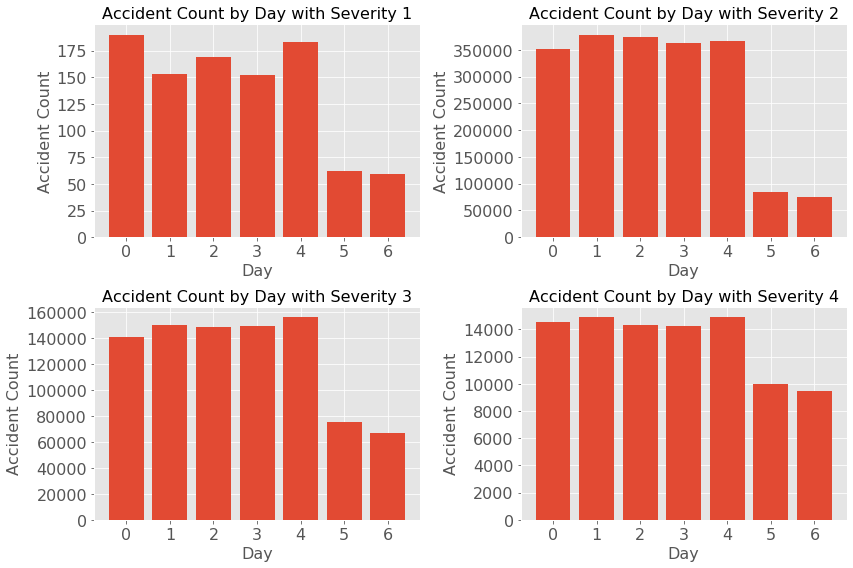

In [102]:
plt.subplots(2,2,figsize=(12,8))
for i in np.arange(1,5):
    plt.subplot(2,2,i)
    plt.hist(data.loc[data["Severity"] == i]['Weekday'], bins=[0,1,2,3,4,5,6,7], align='left', rwidth=0.8)
    plt.title("Accident Count by Day with Severity " + str(i), fontsize=16)
    plt.xlabel("Day", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('1.png')

From the output displayed, we see that there seems to be a decline/drop in the number of accidents during weekends across all severities, though a fairly decrease in severity 3 & 4

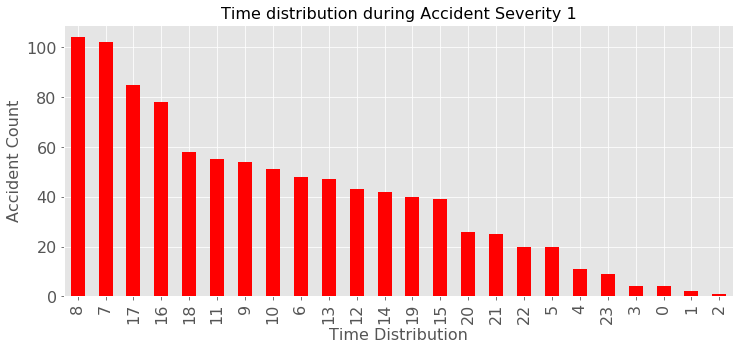

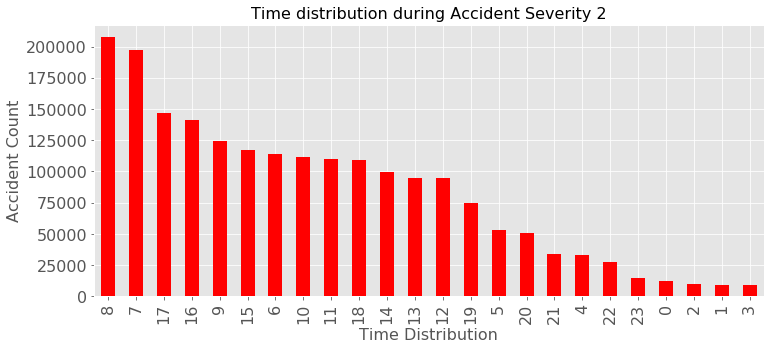

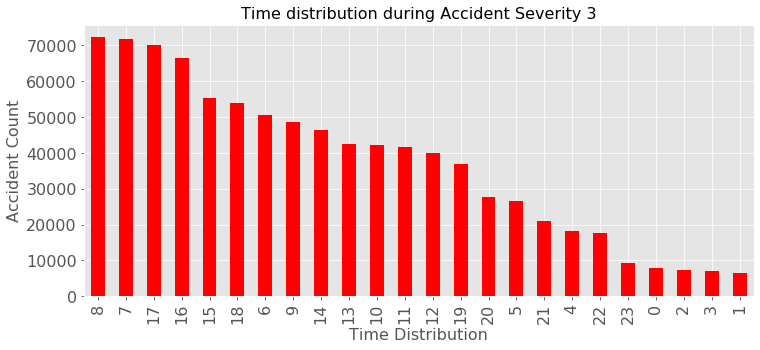

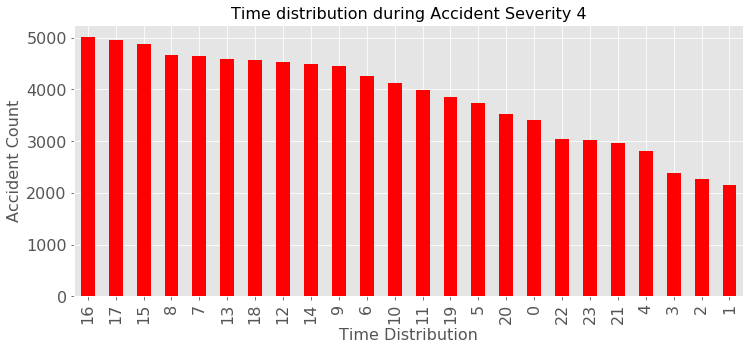

In [103]:
for i in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    data.loc[data["Severity"] == i]['StartHour'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,color='r',align='center',linewidth=1)
    plt.xlabel('Time Distribution',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('Time distribution during Accident Severity ' + str(i),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig(str(i) +'.png')
    

##### Checking the distribution of accident severity base on how long an accident lasted

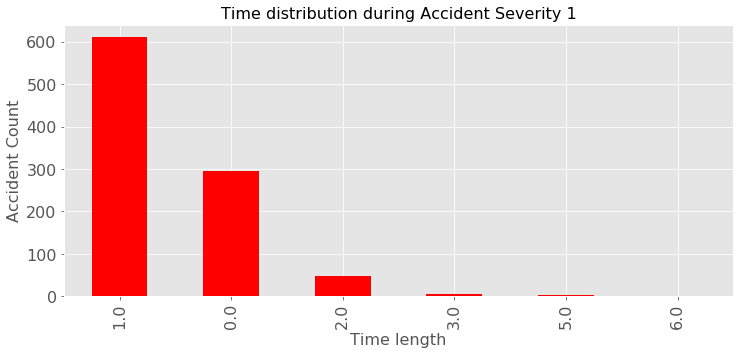

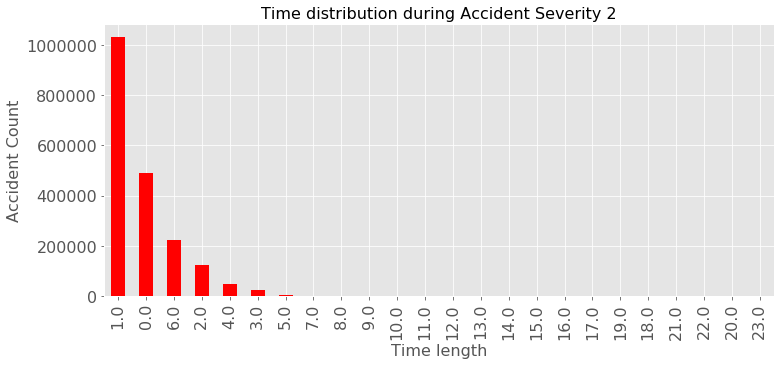

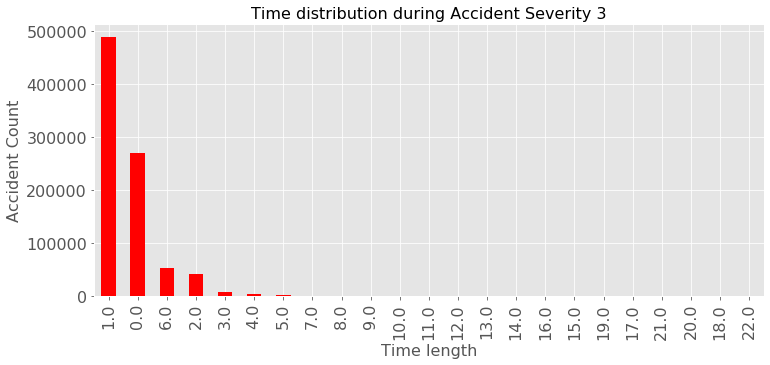

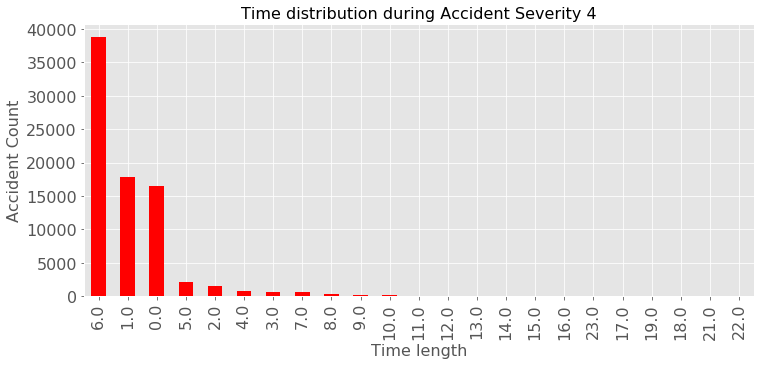

In [115]:
for i in np.arange(1,5):
    plt.subplots(figsize=(12,5))
    data.loc[data["Severity"] == i]['accidentTimeLength'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,color='r',align='center',linewidth=1)
    plt.xlabel('Time length',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('Time distribution during Accident Severity ' + str(i),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.savefig(str(i) +'.png')

Using all the ouputs from above, it can be deduced that across most levels of Severity accidents occurred around `8am` except for severity level 4 which often occur aroud `4pm` and as seen also accidents rarely occur during the wee-hours of the morning except for few cases with high severity as seen for all time distribution in severity 4.

Similarly, most accidents across all severity levels lasted for maximum of `1hr` except for accidents with high severity that mostly lasted for `6hrs`. It is interesting to explore accident severity 4 to determine what period of the year do they occur most 


##### Accident distribution by Month

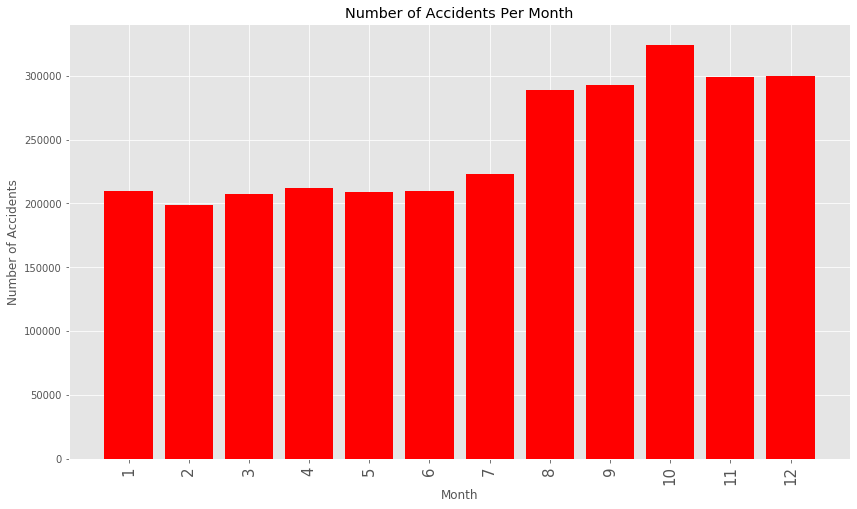

In [116]:
AccidentMonth = data.groupby('Month').count()
plt.figure(figsize=(14, 8))
plt.title('Number of Accidents Per Month')
plt.bar(AccidentMonth.index, AccidentMonth.ID, color='r')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(AccidentMonth.index, rotation='vertical', size=15)
plt.savefig('month.png')

As seen from above, there is an increase in the number of accidents towards the end of fall (Aug/Sept) to Winter where is was an increase at October.

We now explore Severity by month to determine the month that had the highest severity and during what time of the day do they ocurred

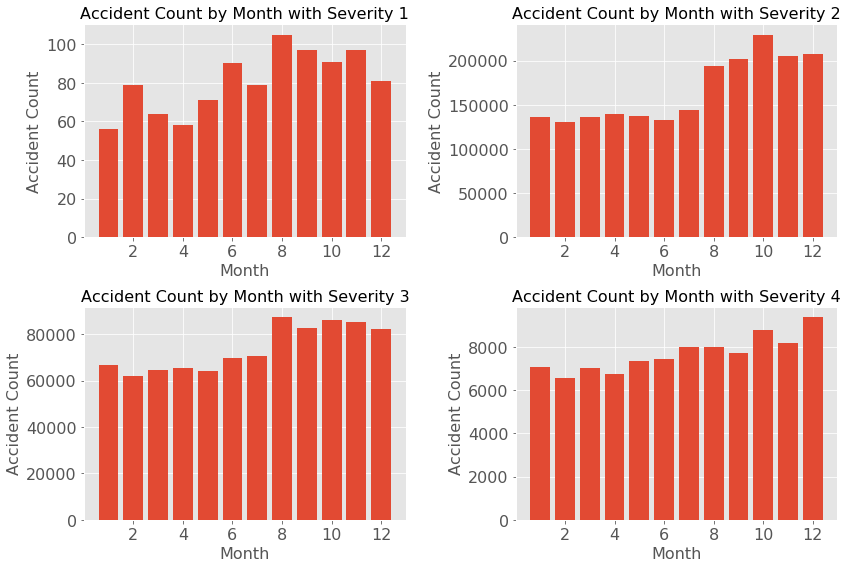

In [119]:
plt.subplots(2,2,figsize=(12,8))
for i in np.arange(1,5):
    plt.subplot(2,2,i)
    plt.hist(data.loc[data["Severity"] == i]['Month'], bins=[1,2,3,4,5,6,7,8,9,10,11,12,13], align='left', rwidth=0.8)
    plt.title("Accident Count by Month with Severity " + str(i), fontsize=16)
    plt.xlabel("Month", fontsize=16)
    plt.ylabel("Accident Count", fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
plt.tight_layout()
plt.savefig('month2.png')

At severity 4 we confirm that also that most of the accidents occurred during fall with an obvious increase in `October` and `December`.
An indepth look into the 3 months to determine the time of the day those high severe accidents occur.


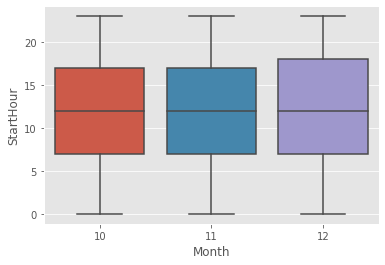

In [118]:
sns.boxplot(x='Month',y='StartHour',data=data[data['Month'].isin([10,11,12]) & (data['Severity']==4)]) 
plt.savefig('month3.png')

As seen most of the high severe accidents  during fall period with focus on Oct - Dec happended around 12pm

###### Conclusion
In summary, we see that most accidents ocurred around 7-8am and at the evening, between 16-17 hrs with average of 1hr from the start of the accident to the end and very minimal acccidents takes more than 5 hours to be cleared, also we also discovered that accidents occur mostly during the fall period in which 50% of highly sever accidents happen around 12pm. In addition we observed that there is a decline in the severity of accidents that occured during weekends as against accident severity during the early weekdays of Monday & Tuesdays

 
 ### Question 2 : Factors Contributing to Accidents

#### Reporting Source

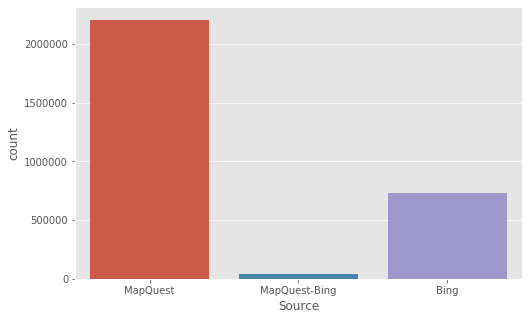

In [120]:
plt.figure(figsize = (8,5))
sns.countplot(data['Source'])
plt.savefig('1.png')

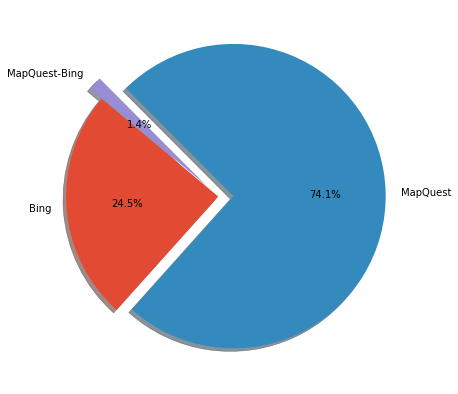

In [131]:
plt.figure(figsize = (15,7))
data_pie = data.groupby('Source').agg({'Source':'count'})
labels = data_pie.index
explode = (0, 0.1,0.1)
plt.pie(data_pie['Source'],labels = labels,explode =explode,autopct='%1.1f%%', shadow=True, startangle=140)
plt.savefig('2.png')

As seen Majority of the sources of the data were from MapQuest

In [123]:
plt.figure(figsize = (15,7))
State_Accident = data.groupby(['State'])['ID'].count().sort_values(ascending=False)
State_Accident.head(10)

State
CA    663204
TX    298062
FL    223746
SC    146689
NC    142460
NY    137799
PA     90395
MI     88694
IL     86390
GA     83620
Name: ID, dtype: int64

<Figure size 1080x504 with 0 Axes>

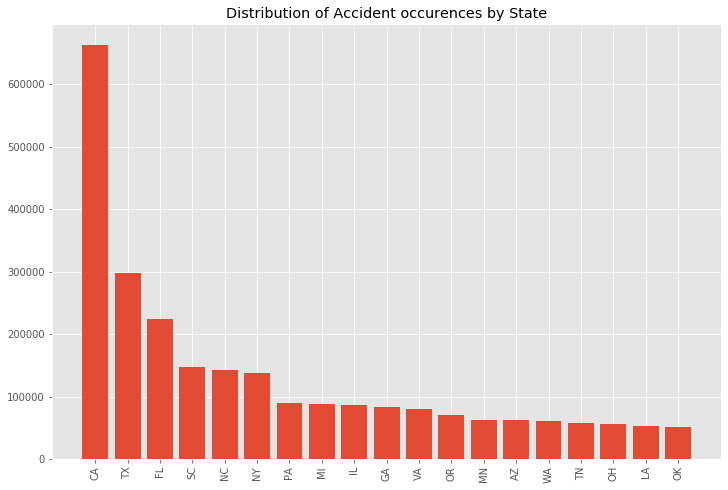

<Figure size 432x288 with 0 Axes>

In [130]:
plt.figure(figsize = (12,8))
plt.xticks(rotation='vertical')
plt.bar(x = State_Accident.index[State_Accident.values>50000],height=State_Accident.values[State_Accident.values>50000])
plt.title("Distribution of Accident occurences by State")
plt.show()
plt.savefig('state.jpg')

In [288]:
(pd.value_counts(data['State'],normalize=True)*100).head()

CA    22.297556
TX    10.021131
FL     7.522555
SC     4.931825
NC     4.789642
Name: State, dtype: float64

In [132]:
data_geo = pd.value_counts(data['State'])

fig = go.Figure(data=go.Choropleth(
    locations=data_geo.index,
    z = data_geo.values.astype(float),
    locationmode = 'USA-states',     
    colorscale = 'YlOrRd',
    colorbar_title = "Total Frequency",
))

fig.update_layout(
    title_text = 'Frequency Distribution of Accidents by State in USA',
    geo_scope='usa',
)

fig.show()
plt.savefig('map.png')

<Figure size 432x288 with 0 Axes>

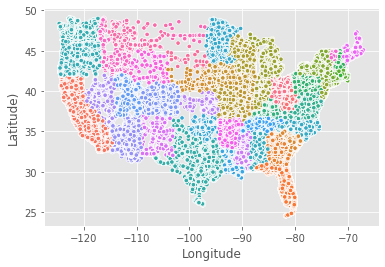

In [300]:
# Map of accidents
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=data, hue='State',s=20, legend=False)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

##### Accidents by City

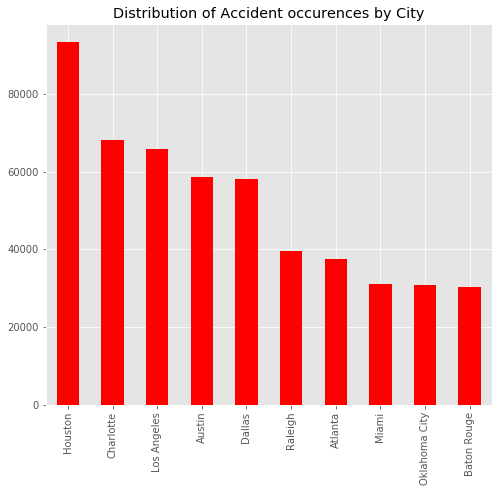

In [134]:
plt.figure(figsize = (8,7))
data['City'].value_counts().head(10).plot(kind='bar',color='r')
plt.title("Distribution of Accident occurences by City")
plt.savefig('city.png')

###### Conclusion

In summary, we see in term of accidents by states and city, California and Houston respectively have the largest proportion of accident occurence in the entire region of United State, and majority of the data source were from MapQuest with a 74% proportion

### Question 3 : Severity Analysis base on Weather

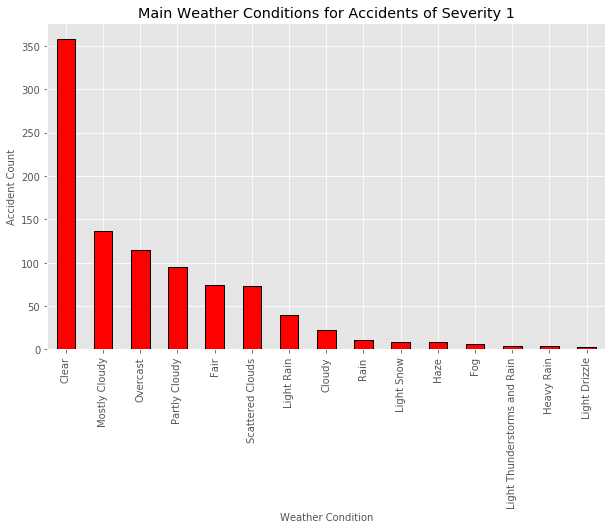

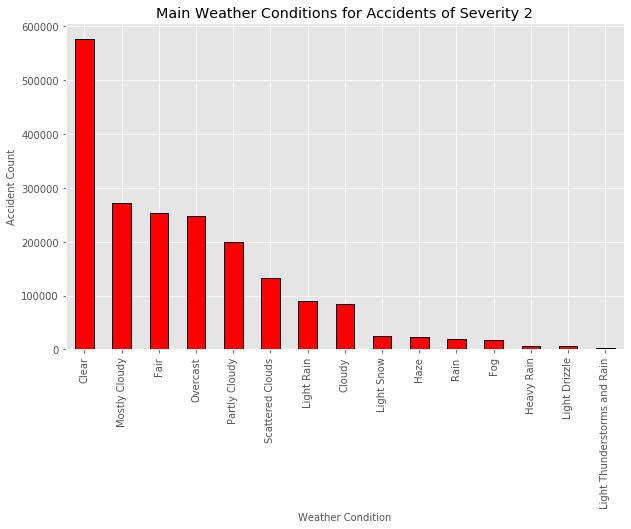

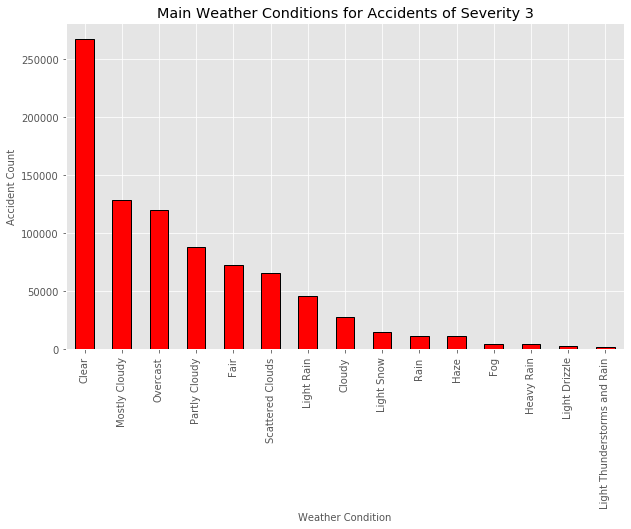

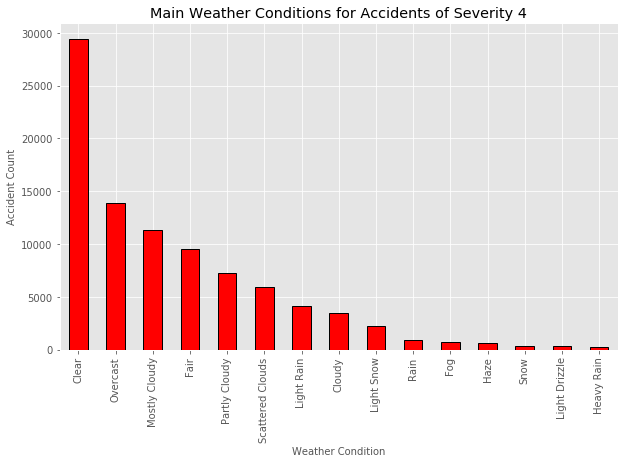

In [135]:
for i in np.arange(1,5):
    plt.subplots(figsize=(10,6))
    data.loc[data["Severity"] == i]['Weather_Condition'].value_counts().sort_values(ascending=False).head(15).plot.bar(width=0.5,color='r',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=10)
    plt.ylabel('Accident Count',fontsize=10)
    plt.title('Main Weather Conditions for Accidents of Severity ' + str(i))
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.savefig(str(i)+'.png')


As seen across severity, most accidents occurred during `Clear` and a little `cloudy` weather which are mostly the regular weather conditions. However, it is important to explore weather conditions which are considered to be bad to determine how the severity of the accidents increased such as ; `Fog`, `Light rain`, `Snow`, `Rain` and `Heavy Rain`. This therefore implies that we will check how severity of the accident increased for this weather Condition

In [94]:
data_weather = data[data['Weather_Condition'].isin(['Fog','Rain','Light Rain','Heavy Rain','Snow'])]

In [97]:
High_map = {1:1,2:2,3:"High",4:"High"}
data_weather['Severity'] = data_weather['Severity'].map(High_map)

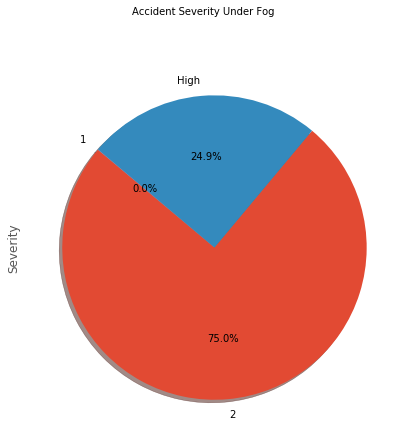

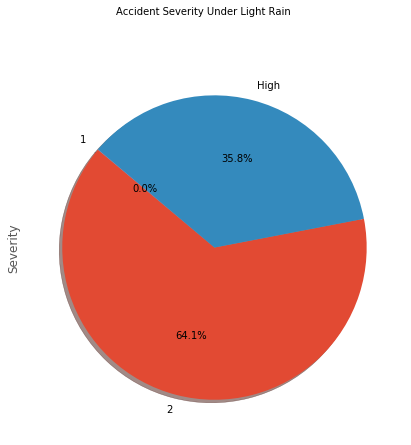

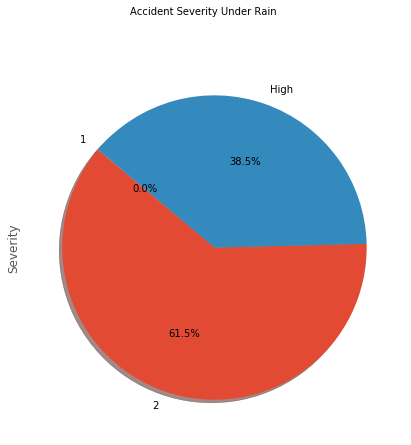

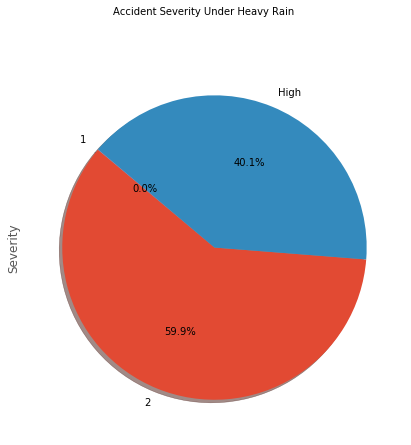

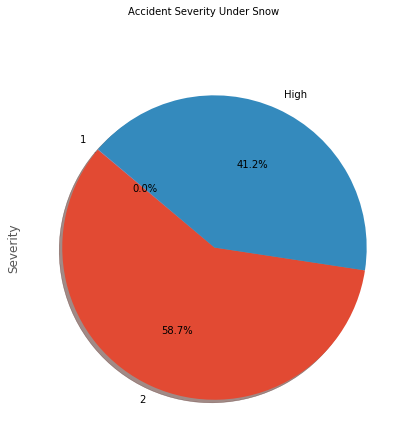

In [136]:
for i in ["Fog","Light Rain","Rain","Heavy Rain","Snow"]:
    plt.subplots(1,1,figsize=(12,7))
    plt.suptitle('Accident Severity Under ' + i,fontsize=10)
    plt.subplot(1,1,1)
    labels = data_weather.loc[data_weather["Weather_Condition"] == 'Rain']['Severity'].value_counts().index
    data_weather.loc[data_weather["Weather_Condition"] == i]['Severity'].value_counts().plot.pie(labels = labels,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.savefig(str(i)+'.png')

#### As seen the proportion of Severity of accidents (case 3 & 4) increased lineearly with weather conditions; 
+ Fog (`25%`) 
+ Light Rain (`36%`)
+ Rain (`39%`)
+ Heavy Rain (`40.1%`)
+ Snow (`41%`)